# Neural Networks for Classification, and Clustering

In this notebook we are going to explore the use of Neural Networks for image classification. We are going to use a dataset of small images of clothes and accessories, the Fashion MNIST. You can find more information regarding the dataset here: https://pravarmahajan.github.io/fashion/

Each instance in the dataset consist of an image, in a format similar to the digit images you have seen in the previous homework, and a label. The labels correspond to the type of clothing, as follows:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

Let's first load the required packages.

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

The following is a function to load the data, that we are going to use later in the notebook.

In [2]:
# helper function to load Fashion MNIST dataset from disk
def load_fashion_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

## TO DO 0
Place your ID ("numero di matricola") that will be used as seed for random generator. Change the ID number in case you observe unexpected behaviours and want to test if this is due to randomization (e.g., train/test split). If you change the ID number explain why you have change it.

In [3]:
ID = 2023860
np.random.seed(ID)

Now we load the dataset using the function above.

In [4]:
#load the fashion MNIST dataset and normalize the features so that each value is in [0,1]
X, y = load_fashion_mnist("data")
# rescale the data
X = X / 255.0

Now we split the data into training and test. Make sure that each label is present at least 10 times
in the training set.

In [5]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rest as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [47 45 54 44 45 49 47 55 61 53]


The following function plots an image and the corresponding label, to be used to inspect the data when needed.

In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

Now let's test the function above and check few images.

INPUT:


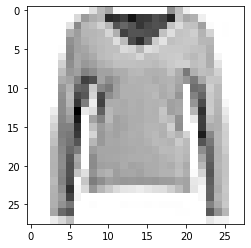

LABEL: 2
INPUT:


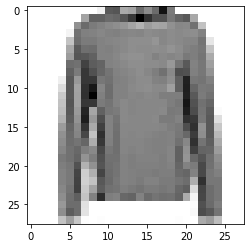

LABEL: 2
INPUT:


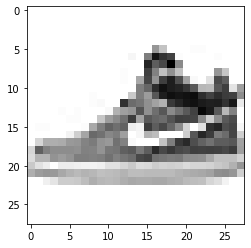

LABEL: 7


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,300)

## TO DO 1

Now use a (feed-forward) Neural Network for prediction. Use the multi-layer perceptron (MLP) classifier MLPClassifier(...) in scikit-learn, with the following parameters: max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization parameter for L2 regularization that is used by the MLP in sklearn.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 100. You can evaluate the architectures you chose using the GridSearchCV with a 5-fold cross-validation, and use the results to pick the best architecture. The code below provides some architectures you can use, but you can choose other ones if you prefer.


In [8]:
#MLPclassifier requires in input the parameter hidden_layer_sizes, that is a tuple specifying the number of 
#neurons in the hidden layers; for example: (10,) means that there is only 1 hidden layer with 10 neurons; 
#(10,50) means that there are 2 hidden layers, the first with 10 neurons, the second with 50 neurons

#these are examples of possible architectures you can test, but feel free to use different architectures! 
hl_parameters = {'hidden_layer_sizes': [(10,), (50,), (10,10,), (50,50,), (50, 50, 50,), (75,), (100,)]}

mlp_test = MLPClassifier(max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID)
mlp_cv = GridSearchCV(mlp_test, hl_parameters)

mlp_cv.fit(X_train, y_train)
    
print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(mlp_cv.best_params_)

print("Score with best parameters:")
print(mlp_cv.best_score_)

print("\nAll scores on the grid:")
for i in range(len(mlp_cv.cv_results_['params'])):
    print(mlp_cv.cv_results_['params'][i], " --> ", mlp_cv.cv_results_['mean_test_score'][i])



RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (100,)}
Score with best parameters:
0.7859999999999999

All scores on the grid:
{'hidden_layer_sizes': (10,)}  -->  0.658
{'hidden_layer_sizes': (50,)}  -->  0.774
{'hidden_layer_sizes': (10, 10)}  -->  0.43600000000000005
{'hidden_layer_sizes': (50, 50)}  -->  0.7739999999999999
{'hidden_layer_sizes': (50, 50, 50)}  -->  0.702
{'hidden_layer_sizes': (75,)}  -->  0.778
{'hidden_layer_sizes': (100,)}  -->  0.7859999999999999


## TO DO 2

What do you observe for different architectures and their scores? How do the number of layers and their sizes affect the performances?

The architecture can be modified in two ways:
 - increasing the hidden layers;
 - increasing the number of nodes per layer.

Contrary to what one might think, the increase in hidden layers does not lead to improvements in the system, but a slight deterioration in performance. See, for example, how the score between the configuration ```(10,)``` and ```(10, 10)``` drops by about 30%.

Instead, increasing the size of the first (and only) layer, the score increases. In our code, if we maximize to 100 the number of nodes, the maximum score of the model is obtained, with an improvement of about 20% compared to the minimum score. The cost of increasing the score is, obviously, the increase in the computational time of the algorith.

## TO DO 3

Now get training and test error (according to the initial split) for a NN with best parameters chosen from the cross-validation above (and learning the NN weights from the entire training set). Use verbose=True
in input so to see how loss changes in iterations. (Note that the loss used by the MLPclassifier may be different from the 0-1 loss, also called *accuracy*.)

In [9]:
#get training and test error for the best NN model from CV

best_mlp_small = MLPClassifier(max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID, verbose=True, hidden_layer_sizes=hl_parameters['hidden_layer_sizes'][mlp_cv.best_index_])
best_mlp_small.fit(X_train, y_train)

training_error = 1. - best_mlp_small.score(X_train, y_train)
test_error = 1. - best_mlp_small.score(X_test, y_test)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

Iteration 1, loss = 2.23009156
Iteration 2, loss = 1.55027752
Iteration 3, loss = 1.02500544
Iteration 4, loss = 0.87274852
Iteration 5, loss = 0.83044400
Iteration 6, loss = 0.72687451
Iteration 7, loss = 0.62343975
Iteration 8, loss = 0.58166844
Iteration 9, loss = 0.48469853
Iteration 10, loss = 0.45791348
Iteration 11, loss = 0.44855173
Iteration 12, loss = 0.37896914
Iteration 13, loss = 0.35681059
Iteration 14, loss = 0.34818004
Iteration 15, loss = 0.30528476
Iteration 16, loss = 0.28645921
Iteration 17, loss = 0.29400200
Iteration 18, loss = 0.28400775
Iteration 19, loss = 0.23218504
Iteration 20, loss = 0.19799409
Iteration 21, loss = 0.21170688
Iteration 22, loss = 0.19770468
Iteration 23, loss = 0.21994713
Iteration 24, loss = 0.16060225
Iteration 25, loss = 0.13786495
Iteration 26, loss = 0.13277095
Iteration 27, loss = 0.14500121
Iteration 28, loss = 0.17043334
Iteration 29, loss = 0.19827710
Iteration 30, loss = 0.14260495
Iteration 31, loss = 0.09522947
Iteration 32, los

## More data 
Now let's do the same but using 10000 (or less if it takes too long on your machine) data points for training. Use the same NN architectures as before, but you can try more if you want!

In [10]:
X = X[permutation]
y = y[permutation]

m_training = 10000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

print("Labels and frequencies in training dataset: ")
np.unique(y_train, return_counts=True)

Labels and frequencies in training dataset: 


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 992, 1032, 1039,  953, 1021,  991, 1004, 1014,  945, 1009]))

## TO DO 4

Now train the NNs with the added data points. Feel free to try more different architectures than before if you want, or less if it takes too much time. You can use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

In [11]:
#for NN we try the same architectures as before
hl_parameters = {'hidden_layer_sizes': [(10,), (50,), (10,10,), (50,50,), (75,), (100,)]}

mlp_large_test = MLPClassifier(max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID)
mlp_large_cv = GridSearchCV(mlp_large_test, hl_parameters)

mlp_large_cv.fit(X_train, y_train)
    
print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(mlp_large_cv.best_params_)

print("Score with best parameters:")
print(mlp_large_cv.best_score_)

print("\nAll scores on the grid:")
for i in range(len(mlp_large_cv.cv_results_['params'])):
    print(mlp_large_cv.cv_results_['params'][i], " --> ", mlp_large_cv.cv_results_['mean_test_score'][i])


RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (100,)}
Score with best parameters:
0.8571

All scores on the grid:
{'hidden_layer_sizes': (10,)}  -->  0.7996000000000001
{'hidden_layer_sizes': (50,)}  -->  0.8464
{'hidden_layer_sizes': (10, 10)}  -->  0.5972999999999999
{'hidden_layer_sizes': (50, 50)}  -->  0.8465
{'hidden_layer_sizes': (75,)}  -->  0.8545
{'hidden_layer_sizes': (100,)}  -->  0.8571


## TO DO 5
Describe your architecture choices and the results you observe with respect to the architectures you used.

As described previously, the best score is given by maximizing the number of nodes for the first and unique hidden layer. In our case, the architecture that we have chosen has 100 nodes for one single hidden layer.

## TO DO 6

Get the train and test error for the best NN you obtained with 10000 points. This time you can run for 100 iterations if you cannot run for 300 iterations. 


In [12]:
#get training and test error for the best NN model from CV

best_mlp_large = MLPClassifier(max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID, verbose=True, hidden_layer_sizes=hl_parameters['hidden_layer_sizes'][mlp_large_cv.best_index_])
best_mlp_large.fit(X_train, y_train)

training_error = 1. - best_mlp_large.score(X_train, y_train)
test_error = 1. - best_mlp_large.score(X_test, y_test)

print ('RESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

Iteration 1, loss = 0.87649048
Iteration 2, loss = 0.50028439
Iteration 3, loss = 0.43487538
Iteration 4, loss = 0.39639171
Iteration 5, loss = 0.38148793
Iteration 6, loss = 0.34320424
Iteration 7, loss = 0.32934509
Iteration 8, loss = 0.31645594
Iteration 9, loss = 0.30239955
Iteration 10, loss = 0.28617447
Iteration 11, loss = 0.27208180
Iteration 12, loss = 0.25911601
Iteration 13, loss = 0.26331852
Iteration 14, loss = 0.25070650
Iteration 15, loss = 0.24386410
Iteration 16, loss = 0.24137191
Iteration 17, loss = 0.22043850
Iteration 18, loss = 0.20674525
Iteration 19, loss = 0.20750015
Iteration 20, loss = 0.20563559
Iteration 21, loss = 0.19484035
Iteration 22, loss = 0.18921588
Iteration 23, loss = 0.18413203
Iteration 24, loss = 0.17237724
Iteration 25, loss = 0.17367366
Iteration 26, loss = 0.16564059
Iteration 27, loss = 0.16663421
Iteration 28, loss = 0.15150613
Iteration 29, loss = 0.15052632
Iteration 30, loss = 0.14564646
Iteration 31, loss = 0.14167104
Iteration 32, los

## TO DO 7

Compare the train and test error you got with a large number of samples with the best one you obtained with only 500 data points. Are the architectures the same or do they differ? What about the errors you get?

Trained the system with several elements, I anticipate that the test error decreases. As a matter of facts ma expectations were confirmed: test error indeed decreased.

Since the architecture has not changed (100 nodes in a single layer), I can easily check the increased performance of the system: the gain on the error was about 30%.

## TO DO 8

Plot an image that was missclassified by NN with m=500 training data points and it is now instead correctly classified by NN with m=10000 training data points.

Index of element:  141
INPUT:


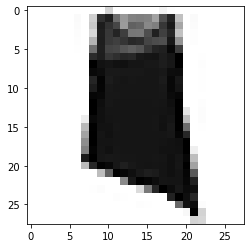

LABEL: 6
Label predicted by mlp_small:  2
Label predicted by mlp_large:  6


In [13]:
# in 'misclassified_small' are stored the index of all misclassified elements of 'X_test', by 'best_mlp_small'
prediction_small = best_mlp_small.predict(X_test)
misclassified_small = np.where(y_test != prediction_small)[0]

# in 'misclassified_large' are stored the index of all misclassified elements of 'X_test', by 'best_mlp_large'
prediction_large = best_mlp_large.predict(X_test)
misclassified_large = np.where(y_test != prediction_large)[0]


# here are stored the index of all misclassified element of 'best_mlp_small'
# which are correctly classified by 'best_mlp_large'
# (this is the 'difference' operation between two sets)
small_misclassified__large_correct = np.setdiff1d(misclassified_small, misclassified_large, assume_unique=True)

# randomly, it is chosen an index for the previous array
randomIndex = np.random.randint(0, high=len(small_misclassified__large_correct), size=1)[0]

# the cell of index 'randomIndex' of the array 'lr_misclassified__SVM_correct'
# is the index of an element of 'X_test' that is misclassified by 'lr_cv',
# but is correctly classified by 'best_SVM'
index_toPlot = small_misclassified__large_correct[randomIndex]


print("Index of element: ", index_toPlot)
plot_input(X_test, y_test, index_toPlot)
print("Label predicted by mlp_small: ", prediction_small[index_toPlot])
print("Label predicted by mlp_large: ", prediction_large[index_toPlot])

Let's plot some of the weigths of the multi-layer perceptron classifier, for the best NN we get with 500 data points and with 10000 data points. The code below plots the weights in a matrix form, where a figure represents all the weights of the edges entering in a hidden node. Notice that the code assumes that the NNs are called "mlp" and "best_mlp_large": you may need to replace such variables with your variable names. 



Weights with 500 data points:


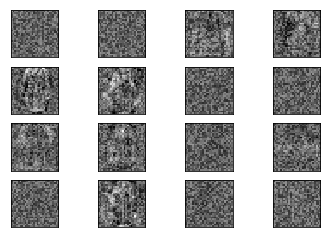

Weights with 10000 data points:


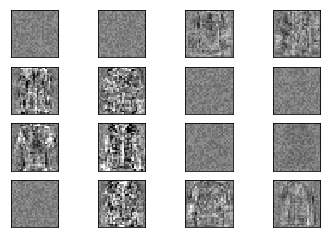

In [14]:
print("Weights with 500 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = best_mlp_small.coefs_[0].min(), best_mlp_small.coefs_[0].max()
for coef, ax in zip(best_mlp_small.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 10000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = best_mlp_large.coefs_[0].min(), best_mlp_large.coefs_[0].max()
for coef, ax in zip(best_mlp_large.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## TO DO 9

Describe what do you observe by looking at the weights.

The first thing that catches the eye is the different granularity of the images. As there are, in the second case, more filters tend to be much more precise, so the granularity decreases.

## TO DO 10

Pick another classifier among the ones we have seen previously (SVM or something else). Report the training and test error for such classifier with 10000 samples in the training set, if possible; if the classifier cannot run with so many data sample reduce the number of samples.

*Note*: if there are parameters to be optimized use cross-validation. If you choose SVM, you can decide if you want to use a single kernel or use the best among many; in the latter case, you need to pick the best kernel using cross-validation (using the functions available in sklearn).

**[WRITE HERE WHAT CLASSIFIER YOU ARE CHOOSING AND WHAT PARAMETERS YOU NEED TO SET.]**

I decided to use the model with SVM because its use is indicated for classification problems like this, where the data is not structured.

To be more efficient, I decided to test the model also in the various kernel options. So I copied and pasted the code used in the Homework to the SVM.

In [15]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [1, 10, 100]}

#run linear SVM
linear_SVM = SVC(kernel='linear')

#find best model using 5-fold CV 
#and train it using all the training data

linear_SVM_cv = GridSearchCV(linear_SVM, parameters) # cv default value if None: 5-fold.
linear_SVM_cv.fit(X_train, y_train)

print('RESULTS FOR LINEAR KERNEL\n')

print("Best parameters set found:")
print(linear_SVM_cv.best_params_)

print("Score with best parameters:")
print(linear_SVM_cv.best_score_)

print("\nAll scores on the grid:")
for i in range(len(linear_SVM_cv.cv_results_['params'])):
    print(linear_SVM_cv.cv_results_['params'][i], " --> ", linear_SVM_cv.cv_results_['mean_test_score'][i])

print("\n\n----------------------\n")




# parameters for poly with degree 2 kernel
parameters = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.]}

#run SVM with poly of degree 2 kernel
poly2_SVM = SVC(kernel='poly',degree=2)

# ADD CODE: DO THE SAME AS ABOVE FOR POLYNOMIAL KERNEL WITH DEGREE=2
poly2_SVM_cv = GridSearchCV(poly2_SVM, parameters)
poly2_SVM_cv.fit(X_train, y_train)

print('\nRESULTS FOR POLY DEGREE=2 KERNEL\n')

print("Best parameters set found:")
print(poly2_SVM_cv.best_params_)

print("Score with best parameters:")
print(poly2_SVM_cv.best_score_)

print("\nAll scores on the grid:")
for i in range(len(poly2_SVM_cv.cv_results_['params'])):
    print(poly2_SVM_cv.cv_results_['params'][i], " --> ", poly2_SVM_cv.cv_results_['mean_test_score'][i])

print("\n\n----------------------\n")




# parameters for rbf SVM
parameters = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.]}

#run SVM with rbf kernel
rbf_SVM = SVC(kernel='rbf')

# ADD CODE: DO THE SAME AS ABOVE FOR RBF KERNEL
rbf_SVM_cv = GridSearchCV(rbf_SVM, parameters)
rbf_SVM_cv.fit(X_train, y_train)

print('\nRESULTS FOR rbf KERNEL\n')

print("Best parameters set found:")
print(rbf_SVM_cv.best_params_)

print("Score with best parameters:")
print(rbf_SVM_cv.best_score_)

print("\nAll scores on the grid:")
for i in range(len(rbf_SVM_cv.cv_results_['params'])):
    print(rbf_SVM_cv.cv_results_['params'][i], " --> ", rbf_SVM_cv.cv_results_['mean_test_score'][i])


RESULTS FOR LINEAR KERNEL

Best parameters set found:
{'C': 1}
Score with best parameters:
0.8365

All scores on the grid:
{'C': 1}  -->  0.8365
{'C': 10}  -->  0.8139
{'C': 100}  -->  0.8097999999999999


----------------------


RESULTS FOR POLY DEGREE=2 KERNEL

Best parameters set found:
{'C': 10, 'gamma': 0.01}
Score with best parameters:
0.8547

All scores on the grid:
{'C': 1, 'gamma': 0.01}  -->  0.8455999999999999
{'C': 1, 'gamma': 0.1}  -->  0.8536999999999999
{'C': 1, 'gamma': 1.0}  -->  0.8489000000000001
{'C': 10, 'gamma': 0.01}  -->  0.8547
{'C': 10, 'gamma': 0.1}  -->  0.849
{'C': 10, 'gamma': 1.0}  -->  0.8489000000000001
{'C': 100, 'gamma': 0.01}  -->  0.8536999999999999
{'C': 100, 'gamma': 0.1}  -->  0.849
{'C': 100, 'gamma': 1.0}  -->  0.8489000000000001


----------------------


RESULTS FOR rbf KERNEL

Best parameters set found:
{'C': 10, 'gamma': 0.01}
Score with best parameters:
0.8739000000000001

All scores on the grid:
{'C': 1, 'gamma': 0.01}  -->  0.8622
{'C':

In [16]:
#get training and test error for the best SVM model from CV
best_SVM = SVC(C=10, kernel='rbf', gamma=0.01)

# fit the model on the entire training set
best_SVM.fit(X_train, y_train)


training_error_other = 1. - best_SVM.score(X_train,y_train)
test_error_other = 1. - best_SVM.score(X_test,y_test)

print ('RESULTS FOR OTHER CLASSIFIER\n')

print ("Best training error (other model): %f" % training_error_other)
print ("Best test error (other model): %f" % test_error_other)

RESULTS FOR OTHER CLASSIFIER

Best training error (other model): 0.014500
Best test error (other model): 0.124100


## TO DO 11
Compare the results of NN and of the other classifier you have chosen above. Which classifier would you preferer? Provide a brief explanation.

| | Best NN | Best SVM (other model) |
| :-: | :-: | :-: |
| Training error | 0.000000 | 0.014500 |
| Test error | 0.139020 | 0.124100 |


As we can see in the table above, the best training error is given by the Neural Network, that fits perfectly the training set. But the model formed by SVM, in particular with an 'rbf' kernel, gets a better results.

# Clustering with K-means

Clustering is a useful technique for *unsupervised* learning. We are now going to cluster 2000 images in the fashion MNIST dataset, and try to understand if the clusters we obtain correspond to the true labels.

In [17]:
#load the required packages

from sklearn import metrics
from sklearn.cluster import KMeans

(Note that the code below assumes that the data has already been transformed as in the NN part of the notebook, so make sure to run the code for the transformation even if you do not complete the part on NN.)

In [18]:
#let's consider only 2000 data points

X = X[permutation]
y = y[permutation]

m_training = 2000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

## TO DO 1
Cluster the points using the KMeans() and fit() functions (see the userguide for details). For Kmeans, set: n_clusters=10 as number of clusters; n_init=10 as the number of times the algorithm will be run with different centroid seeds; random_state = ID. You can use the default setting for the other parameters.

In [19]:
kmeans = KMeans(n_clusters=10, n_init=10, random_state=ID)
kmeans.fit(X_train)

KMeans(n_clusters=10, random_state=2023860)

## Comparison of clusters with true labels

## TO DO 2
Now compare the obtained clusters with the true labels, using the function sklearn.metrics.cluster.contingency_matrix() (see the userguide for details). The function prints a matrix $A$ such that entry $A_{i,j}$ is is the number of samples in true class $i$ and in predicted class $j$.

In [20]:
# compute and print the contingency matrix for the true labels vs the clustering assignments
contingency_matrix = metrics.cluster.contingency_matrix(y_train, kmeans.predict(X_train))

print(contingency_matrix)

[[ 10   1  37   0 102   0  70   4   0   0]
 [  5   1   8   0   1   0   5   0   0 180]
 [ 13 126   5   0   1   0  65   2   0   1]
 [ 10   4  83   0   3   0  12   0   0  67]
 [  7  94  22   0   0   0  29   0   0   4]
 [141   0   0  36   0   7   1   0  22   0]
 [ 18  65  19   0  17   0  87   5   0   1]
 [ 14   0   0 164   0   1   0   0  33   0]
 [ 18  11   4  11   1   0  37 118   4   0]
 [  3   0   0   6   0  89   0   0  95   0]]


## TO DO 3
Based on the matrix shown above, comment on the results of clustering in terms of adherence to the true labels.

I expect the diagonal values to be much higher than the other cells. If so, the system would be able to classify the elements correctly.

Unfortunately, however, this does not happen. This means that the classifier is not optimized for the data provided.

## Choice of k with silhoutte coefficient
In many real applications it is unclear what is the correct value of $k$ to use. In practice one tries different values of $k$ and then uses some external score to choose a value of $k$. One such score is the silhoutte coefficient, that can be computed with metrics.silhouette_score(). See the definition of the silhoutte coefficient in the userguide.

## TO DO 4
Compute the clustering for k=2,3,...,15 (other parameters as above) and print the silhoutte coefficient for each such clustering.

In [21]:
#run k-means with 10 choices of initial centroids for a range of values of n_clusters

for i in range(2,16):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=ID)
    kmeans.fit(X_train)
    
    predicted = kmeans.predict(X_test)
    
    silhouttescore = metrics.silhouette_score(X_test, predicted, metric="euclidean", random_state=ID)
    print("Silhoutte coefficient for number of clusters="+str(i)+": "+str(silhouttescore))

Silhoutte coefficient for number of clusters=2: 0.19314824870876038
Silhoutte coefficient for number of clusters=3: 0.18094746203810433
Silhoutte coefficient for number of clusters=4: 0.1787885907990329
Silhoutte coefficient for number of clusters=5: 0.16083838089351862
Silhoutte coefficient for number of clusters=6: 0.1559824790592045
Silhoutte coefficient for number of clusters=7: 0.16614471527610183
Silhoutte coefficient for number of clusters=8: 0.1536227816365815
Silhoutte coefficient for number of clusters=9: 0.15069359645950592
Silhoutte coefficient for number of clusters=10: 0.1432059332857116
Silhoutte coefficient for number of clusters=11: 0.14197405064412666
Silhoutte coefficient for number of clusters=12: 0.14309468048102203
Silhoutte coefficient for number of clusters=13: 0.1346334651291346
Silhoutte coefficient for number of clusters=14: 0.1311758543660876
Silhoutte coefficient for number of clusters=15: 0.12300715858739861


## TO DO 5

Based on the silhoutte score, which $k$ would you pick? Motivate your choice. Does your choice match what you know about the data? If yes, explain why you think this is the case; if no, explain what you think may be the reason.

As seen above, the kmeans model does not work best for this type of data. A further test has given us the choice of ```k``` with the coefficient of silhouette. In fact, for the sake of logic, the ideal should be ```k=10```, since there are ten types of clothes. The maximum score is obtained, however, with ```k=2```, that is dividing the set of data into only two groups.

The low value for the silhouette coefficient gives us further confirmation that the kmeans model is not ideal for this type of classification.